<a href="https://colab.research.google.com/github/ShilPi-01/BankLoanAnalysis_BI/blob/main/Bank_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
df = pd.read_csv('/content/Banking.csv')
df.head(5)

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,Retail,male,Victor Dean
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,Institutional,male,Jeremy Porter
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,Private Bank,female,Ernest Knight
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,Commercial,male,Eric Shaw
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,Retail,female,Kevin Kim


In [3]:
df.shape

(3000, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Client ID                 3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Location ID               3000 non-null   int64  
 4   Joined Bank               3000 non-null   object 
 5   Banking Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee Structure             3000 non-null   object 
 9   Loyalty Classification    3000 non-null   object 
 10  Estimated Income          3000 non-null   float64
 11  Superannuation Savings    3000 non-null   float64
 12  Amount of Credit Cards    3000 non-null   int64  
 13  Credit Card Balance       3000 non-null   float64
 14  Bank Loa

In [5]:
df.describe()

,Age,Location ID,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000
mean,51.039667,21563.323000,171305.034263,25531.599673,1.463667,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333
std,19.854760,12462.273017,111935.808209,16259.950770,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191
min,17.000000,12.000000,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000
25%,34.000000,10803.500000,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000
50%,51.000000,21129.500000,142313.480000,22357.355000,1.000000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000
75%,69.000000,32054.500000,242290.305000,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000
max,85.000000,43369.000000,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000


In [6]:
df['Estimated Income'].min()

15919.48

In [7]:
bins = [0, 10000, 30000, float('inf')]
labels = ['low', 'med', 'high']

df['Income Band']=pd.cut(df['Estimated Income'], bins=bins, labels=labels, rights=False)



TypeError: cut() got an unexpected keyword argument 'rights'

In [8]:
bins = [0, 10000, 30000, float('inf')]
labels = ['low', 'med', 'high']

df['Income Band']=pd.cut(df['Estimated Income'], bins=bins, labels=labels, right=False)



<Axes: xlabel='Income Band'>

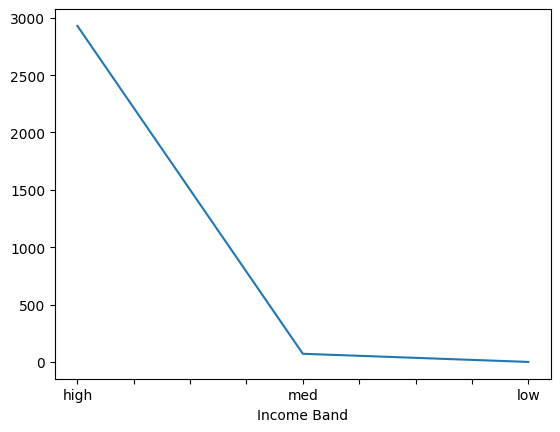

In [11]:
df['Income Band'].value_counts().plot()

<Axes: xlabel='Income Band'>

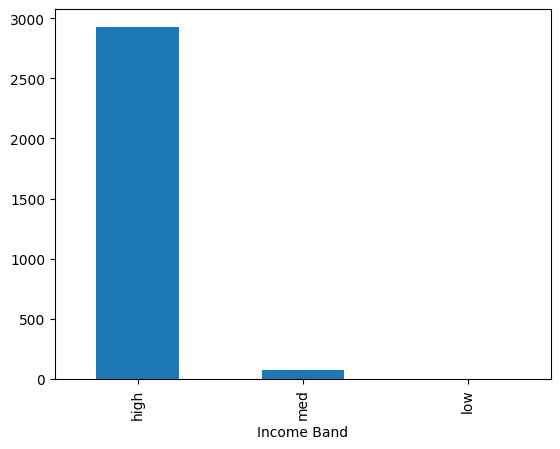

In [12]:
df['Income Band'].value_counts().plot(kind='bar')


In [13]:
categorical_cols=df[["BRId","GenderId","IAId","Amount of Credit Cards","Nationality","Occupation","Fee Structure","Loyalty Classification","Properties Owned","Risk Weighting","Income Band"]].columns

for col in categorical_cols:
  print(f"Value Count for '{Col}':")
  display(df[col].value_counts())

NameError: name 'Col' is not defined

In [14]:
categorical_cols=df[["BRId","GenderId","IAId","Amount of Credit Cards","Nationality","Occupation","Fee Structure","Loyalty Classification","Properties Owned","Risk Weighting","Income Band"]].columns

for col in categorical_cols:
  print(f"Value Count for '{col}':")
  display(df[col].value_counts())

Value Count for 'BRId':


,count
BRId,
Private Bank,1352
Retail,660
Institutional,495
Commercial,493


Value Count for 'GenderId':


,count
GenderId,
female,1512
male,1488


Value Count for 'IAId':


,count
IAId,
Victor Dean,177
Jeremy Porter,177
Ernest Knight,177
Eric Shaw,177
Joe Carroll,177
Steve Sanchez,176
Daniel Carroll,176
Victor Gutierrez,176
Lawrence Sanchez,176


Value Count for 'Amount of Credit Cards':


,count
Amount of Credit Cards,
1,1922
2,765
3,313


Value Count for 'Nationality':


,count
Nationality,
European,1309
Asian,754
American,507
Australian,254
African,176


Value Count for 'Occupation':


,count
Occupation,
Associate Professor,28
Structural Analysis Engineer,28
Recruiter,25
Account Coordinator,24
Human Resources Manager,24
...,...
Office Assistant IV,8
Automation Specialist I,7
Computer Systems Analyst I,6


Value Count for 'Fee Structure':


,count
Fee Structure,
High,1476
Mid,962
Low,562


Value Count for 'Loyalty Classification':


,count
Loyalty Classification,
Jade,1331
Silver,767
Gold,585
Platinum,317


Value Count for 'Properties Owned':


,count
Properties Owned,
2,777
1,776
3,742
0,705


Value Count for 'Risk Weighting':


,count
Risk Weighting,
2,1222
1,836
3,460
4,322
5,160


Value Count for 'Income Band':


,count
Income Band,
high,2929
med,71
low,0


Value Count for 'BRId':


,count
BRId,
Private Bank,1352
Retail,660
Institutional,495
Commercial,493


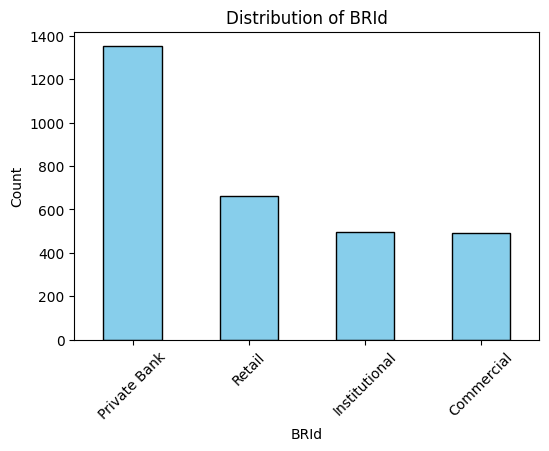

Value Count for 'GenderId':


,count
GenderId,
female,1512
male,1488


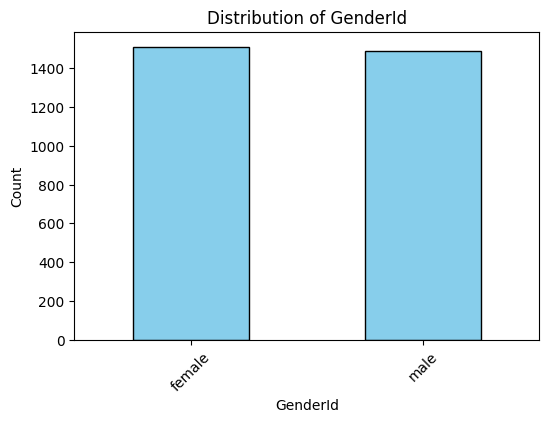

Value Count for 'IAId':


,count
IAId,
Victor Dean,177
Jeremy Porter,177
Ernest Knight,177
Eric Shaw,177
Joe Carroll,177
Steve Sanchez,176
Daniel Carroll,176
Victor Gutierrez,176
Lawrence Sanchez,176


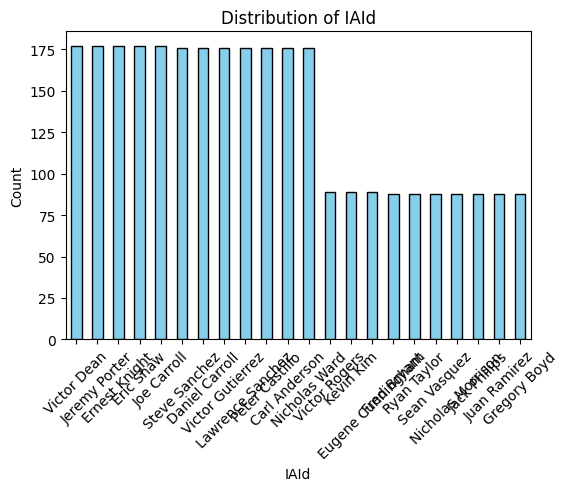

Value Count for 'Amount of Credit Cards':


,count
Amount of Credit Cards,
1,1922
2,765
3,313


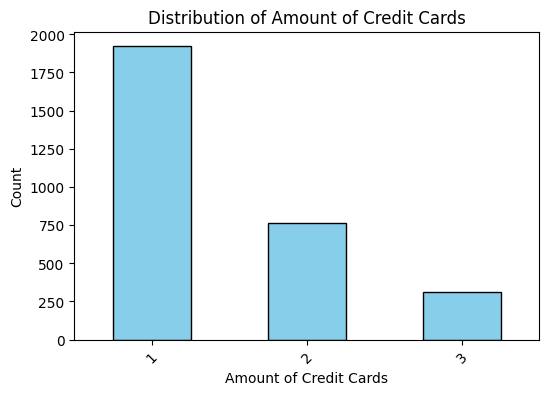

Value Count for 'Nationality':


,count
Nationality,
European,1309
Asian,754
American,507
Australian,254
African,176


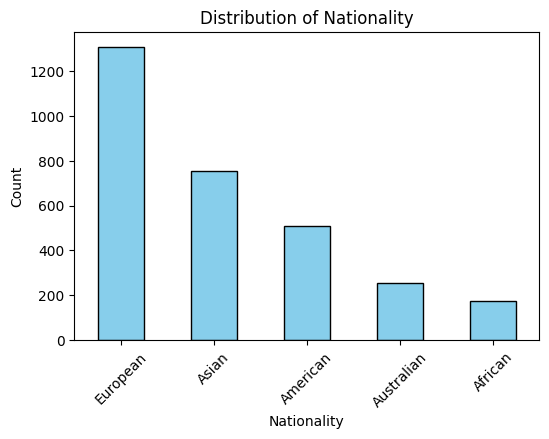

Value Count for 'Occupation':


,count
Occupation,
Associate Professor,28
Structural Analysis Engineer,28
Recruiter,25
Account Coordinator,24
Human Resources Manager,24
...,...
Office Assistant IV,8
Automation Specialist I,7
Computer Systems Analyst I,6


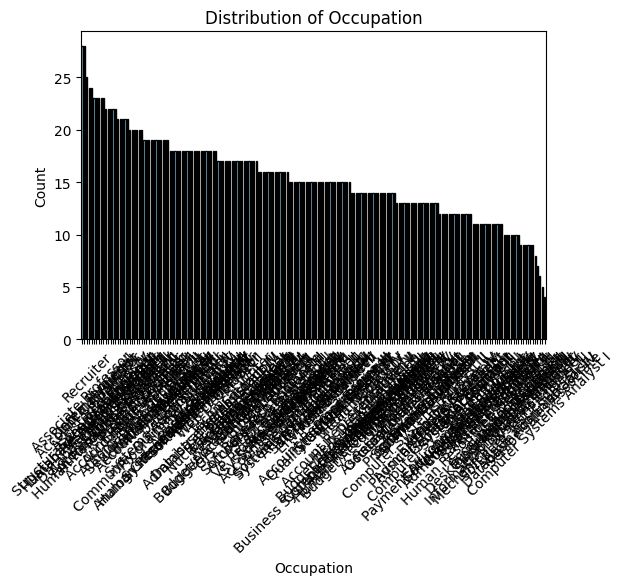

Value Count for 'Fee Structure':


,count
Fee Structure,
High,1476
Mid,962
Low,562


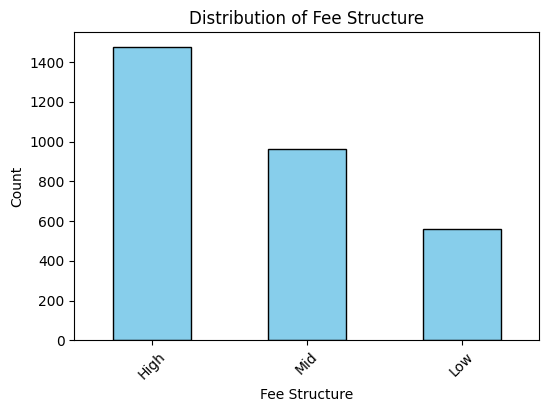

Value Count for 'Loyalty Classification':


,count
Loyalty Classification,
Jade,1331
Silver,767
Gold,585
Platinum,317


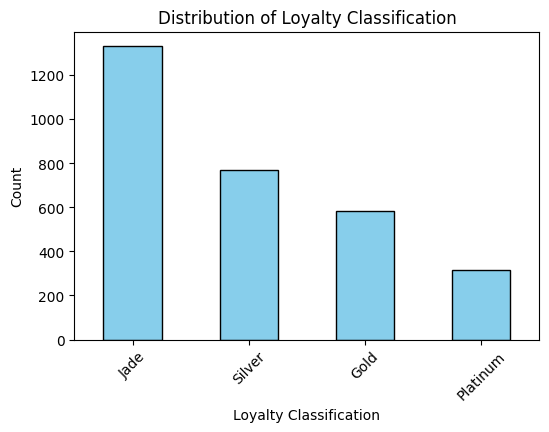

Value Count for 'Properties Owned':


,count
Properties Owned,
2,777
1,776
3,742
0,705


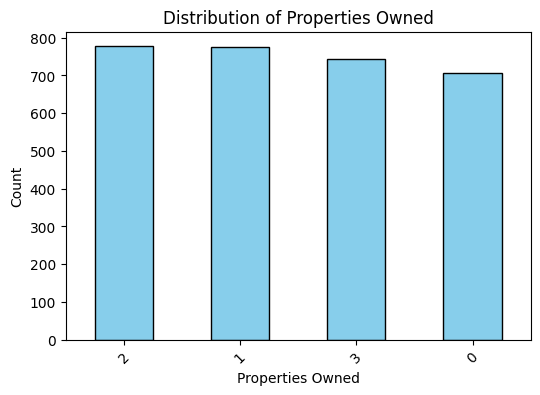

Value Count for 'Risk Weighting':


,count
Risk Weighting,
2,1222
1,836
3,460
4,322
5,160


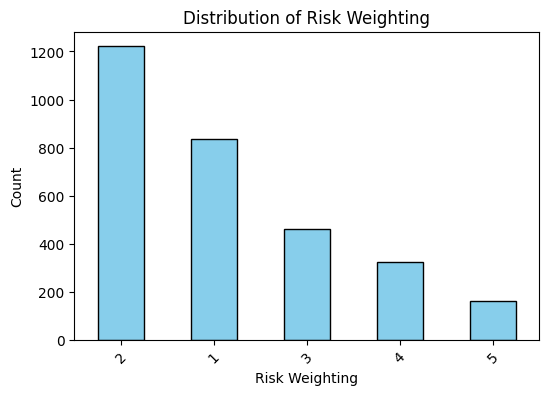

Value Count for 'Income Band':


,count
Income Band,
high,2929
med,71
low,0


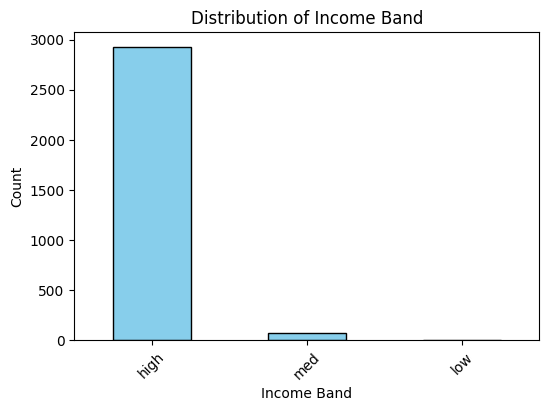

In [15]:
import matplotlib.pyplot as plt

categorical_cols = df[["BRId","GenderId","IAId","Amount of Credit Cards",
                       "Nationality","Occupation","Fee Structure",
                       "Loyalty Classification","Properties Owned",
                       "Risk Weighting","Income Band"]].columns

for col in categorical_cols:
    print(f"Value Count for '{col}':")
    display(df[col].value_counts())   # show frequency table

    # Plot the bar chart
    df[col].value_counts().plot(kind='bar', figsize=(6,4), color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)  # rotate labels for readability
    plt.show()


In [16]:
for i, predictor in enumerated(df[["BRId","GenderId","IAId","Amount of Credit Cards","Nationality","Occupation","Fee Structure","Loyalty Classification","Properties Owned","Risk Weighting","Income Band"]].columns):
plt.figure(i)
sns.countplot(data=df, x=predictor , hue='GenderId')

SyntaxError: expected ':' (ipython-input-3647809141.py, line 1)

In [17]:
for i, predictor in enumerated(df[["BRId","GenderId","IAId","Amount of Credit Cards","Nationality","Occupation","Fee Structure","Loyalty Classification","Properties Owned","Risk Weighting","Income Band"]].columns):
plt.figure(i)
sns.countplot(data=df, x=predictor , hue='GenderId')

IndentationError: expected an indented block after 'for' statement on line 1 (ipython-input-3134330174.py, line 2)

In [18]:
for i, predictor in enumerated(df[["BRId","GenderId","IAId","Amount of Credit Cards","Nationality","Occupation","Fee Structure","Loyalty Classification","Properties Owned","Risk Weighting","Income Band"]].columns):
    plt.figure(i)
    sns.countplot(data=df, x=predictor , hue='GenderId')

NameError: name 'enumerated' is not defined

In [19]:
for i, predictor in categorical_cols(df[["BRId","GenderId","IAId","Amount of Credit Cards","Nationality","Occupation","Fee Structure","Loyalty Classification","Properties Owned","Risk Weighting","Income Band"]].columns):
    plt.figure(i)
    sns.countplot(data=df, x=predictor , hue='GenderId')

TypeError: 'Index' object is not callable

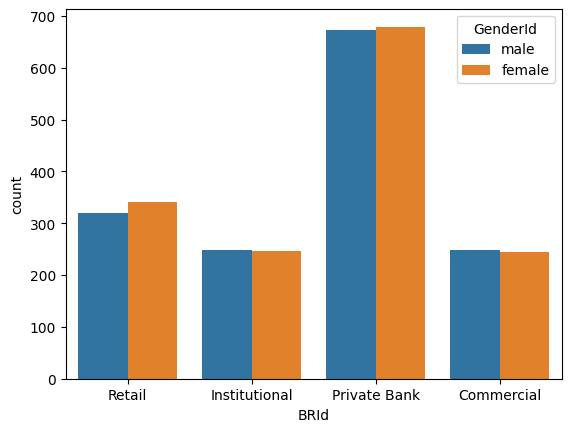

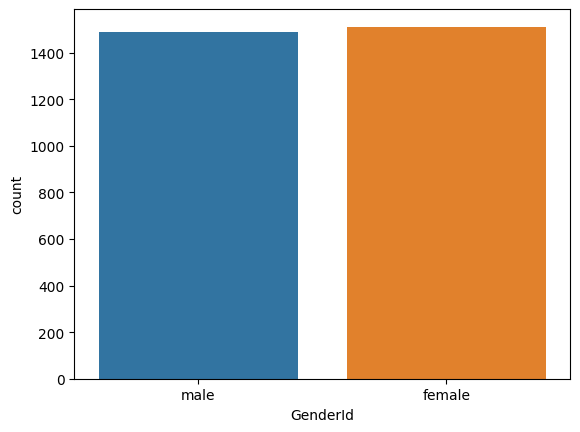

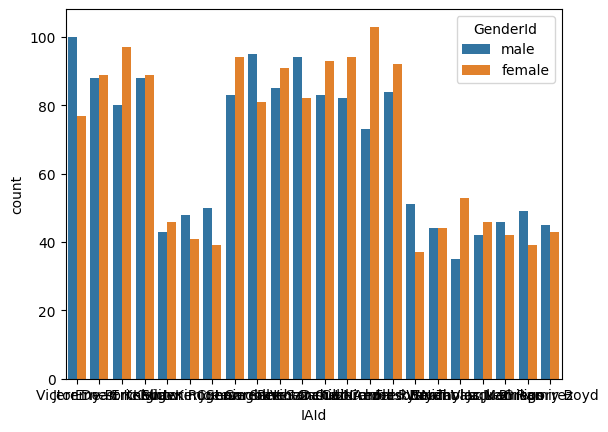

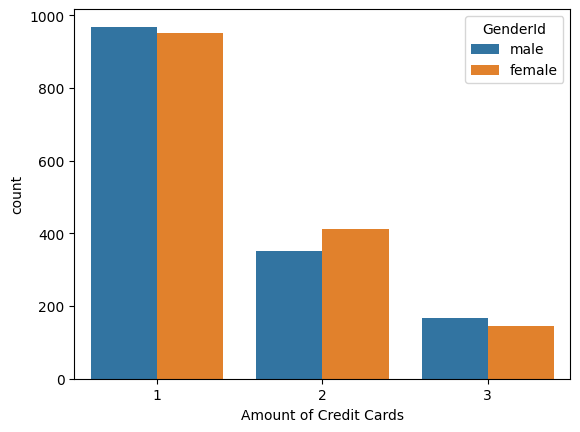

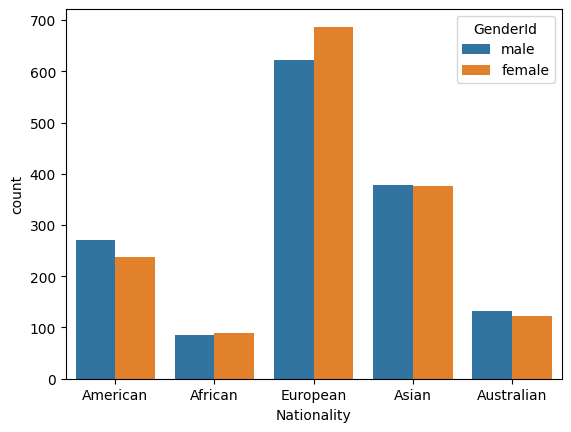

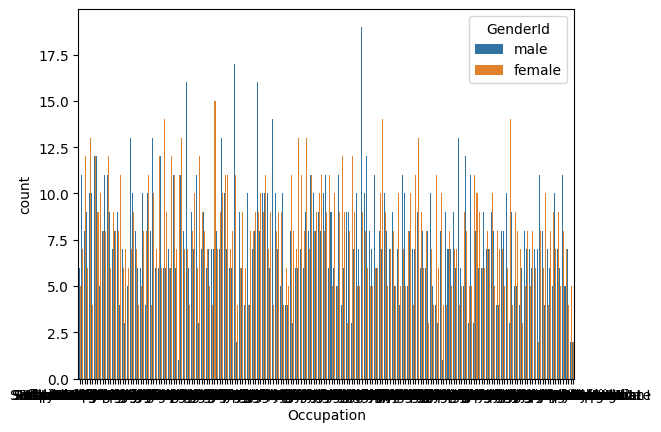

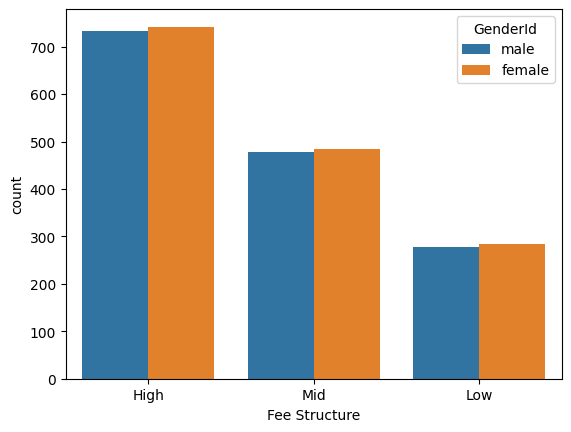

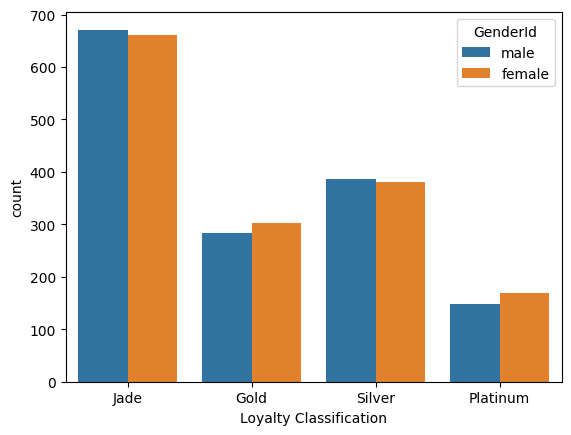

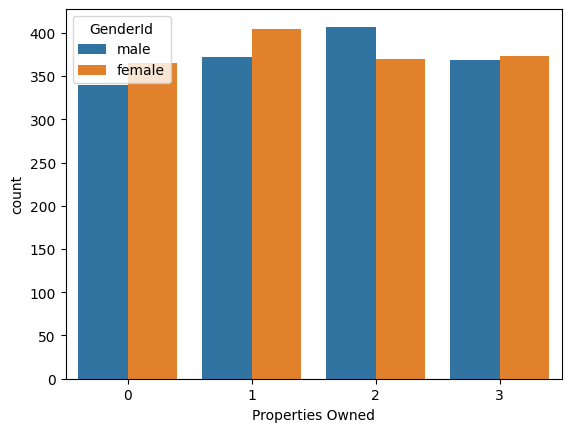

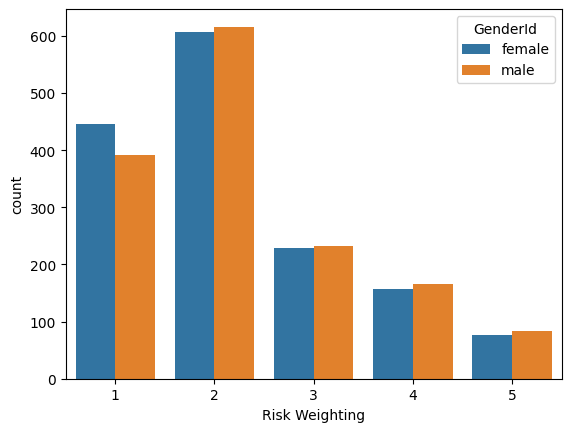

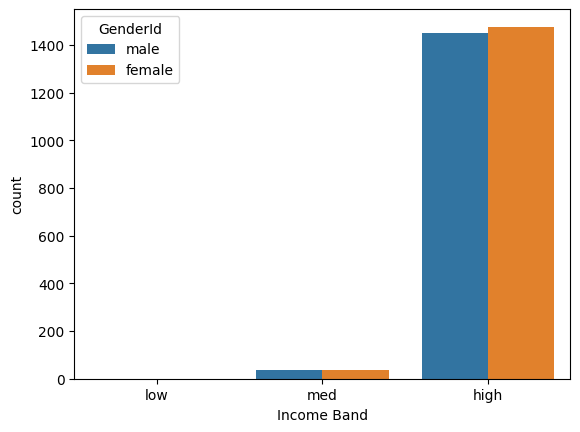

In [20]:
for i, predictor in enumerate(df[["BRId","GenderId","IAId","Amount of Credit Cards","Nationality","Occupation","Fee Structure","Loyalty Classification","Properties Owned","Risk Weighting","Income Band"]].columns):
    plt.figure(i)
    sns.countplot(data=df, x=predictor , hue='GenderId')

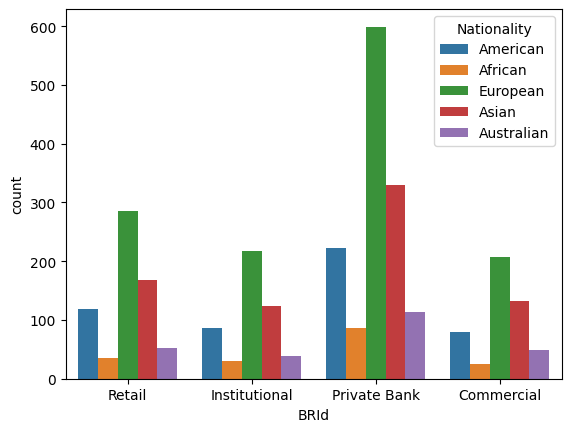

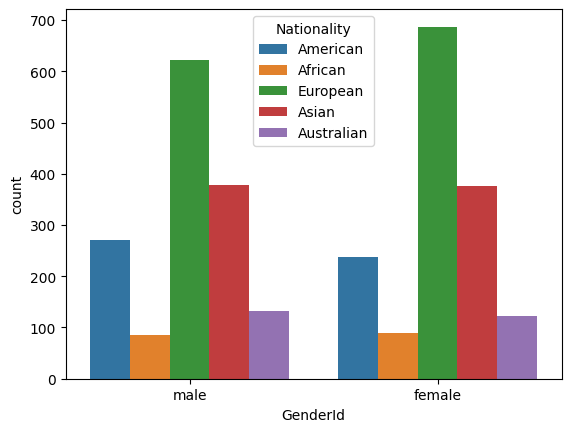

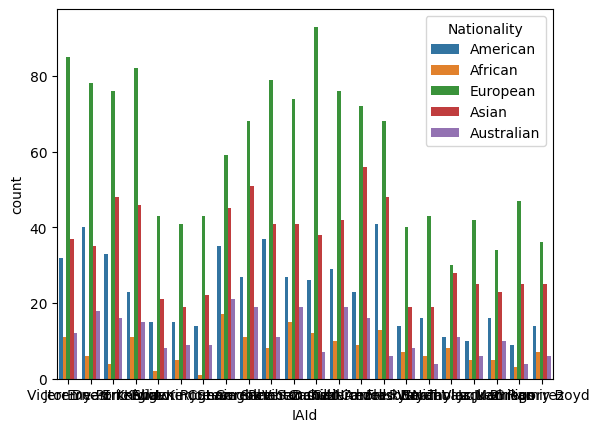

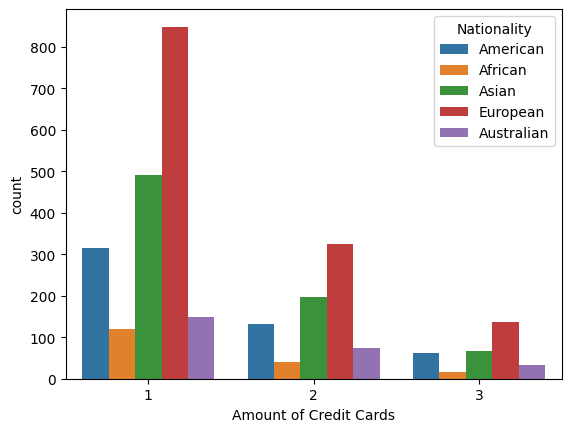

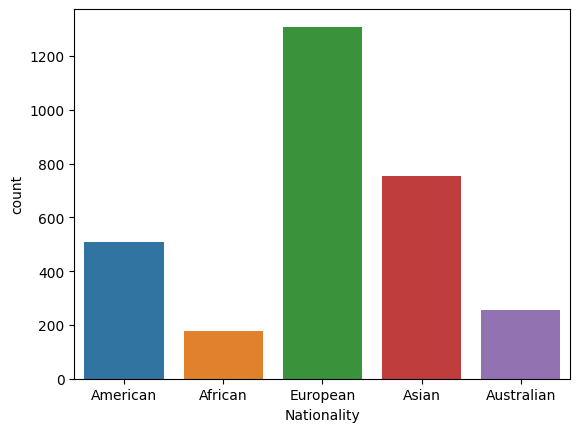

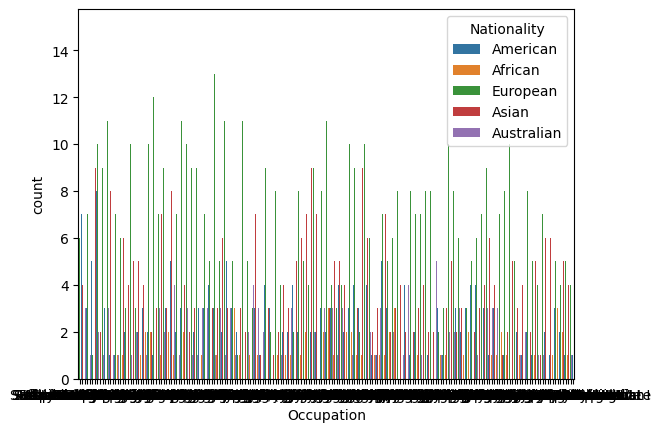

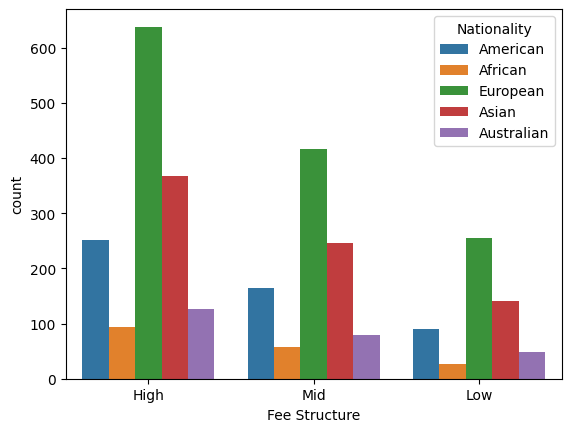

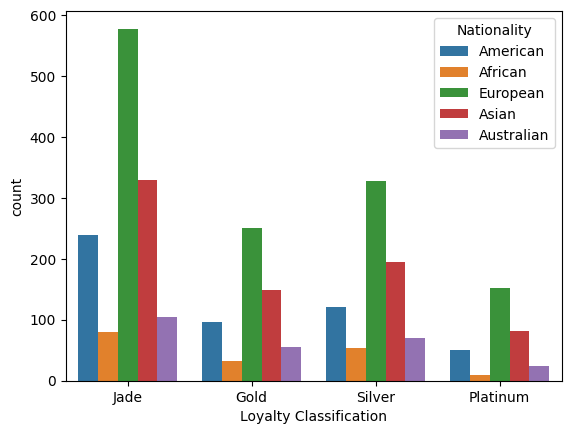

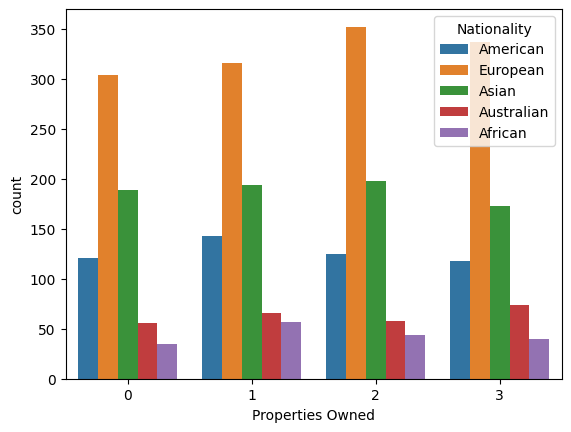

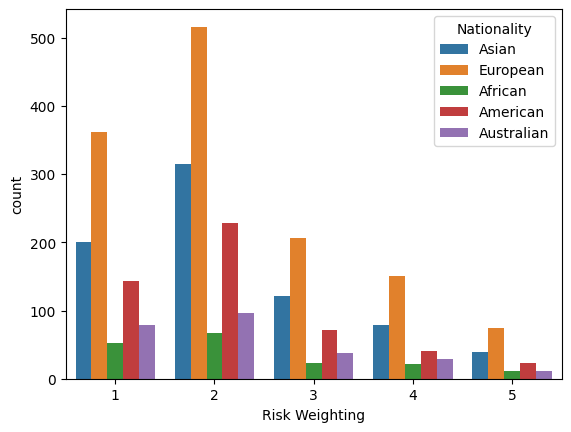

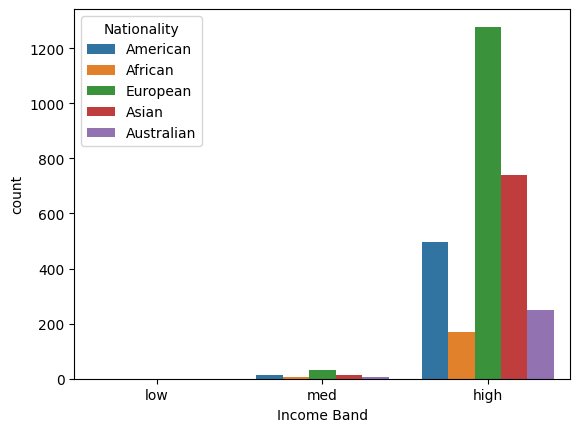

In [21]:
for i, predictor in enumerate(df[["BRId","GenderId","IAId","Amount of Credit Cards","Nationality","Occupation","Fee Structure","Loyalty Classification", "Properties Owned","Risk Weighting","Income Band"]].columns):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Nationality')


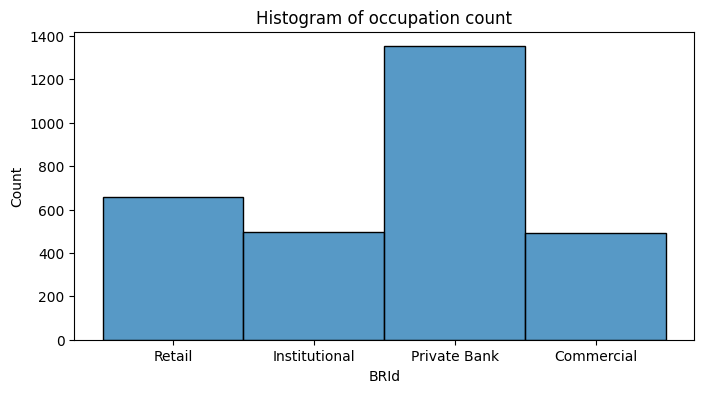

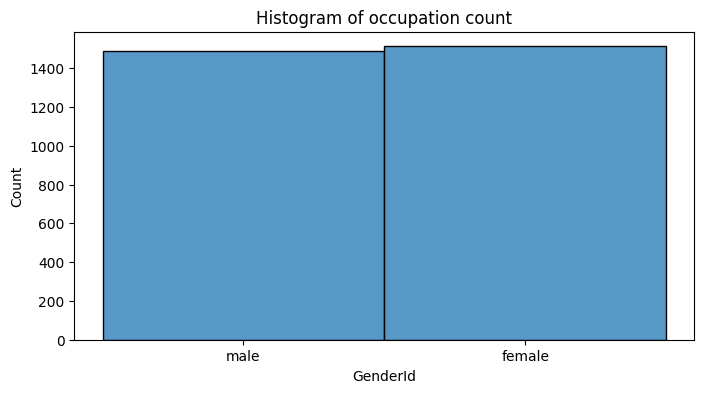

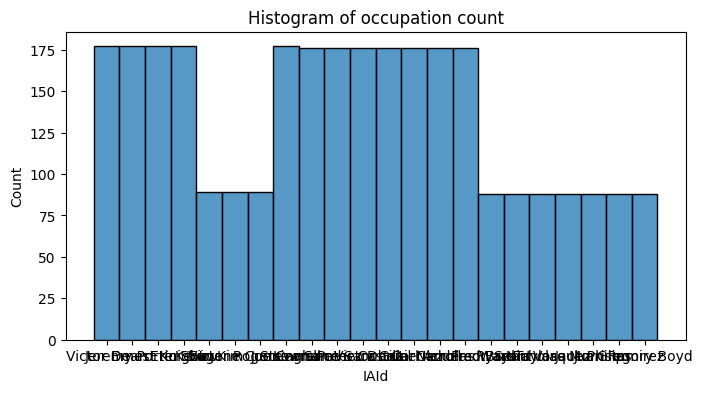

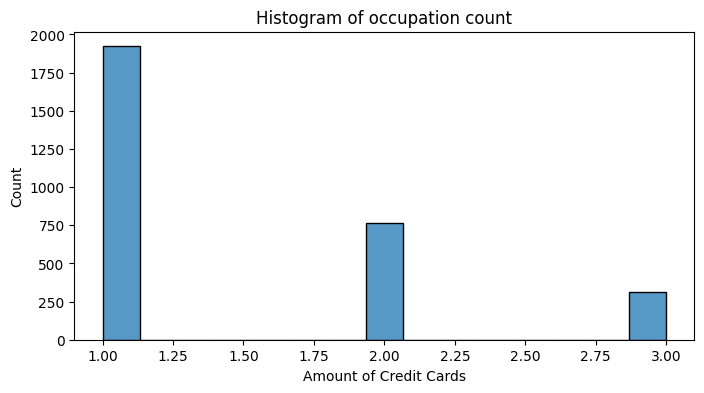

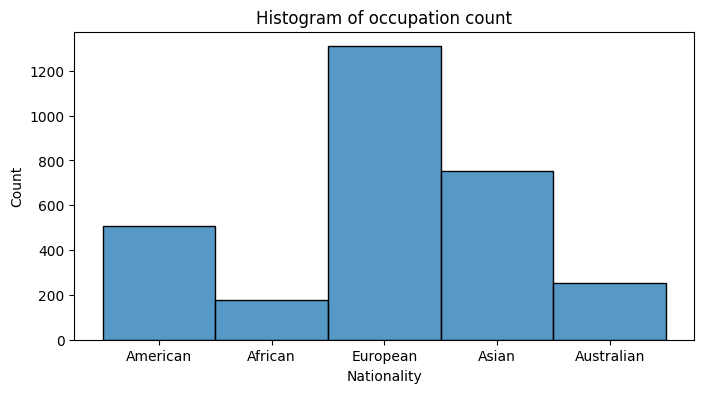

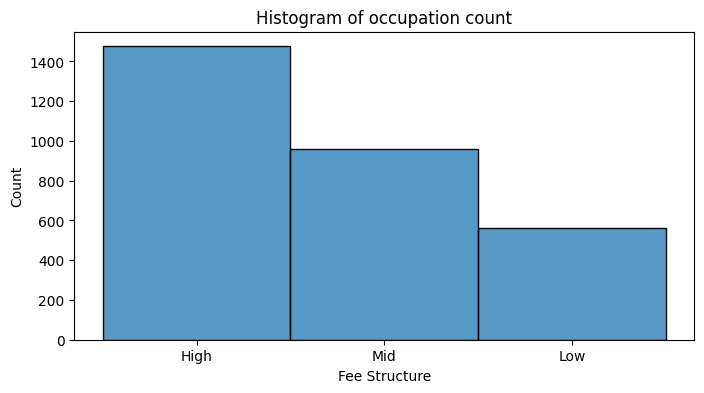

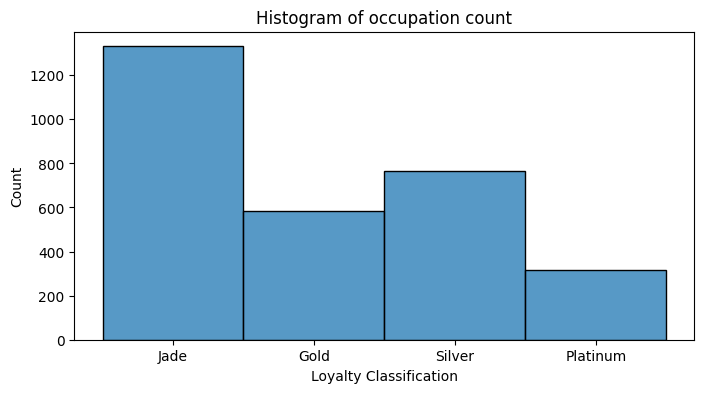

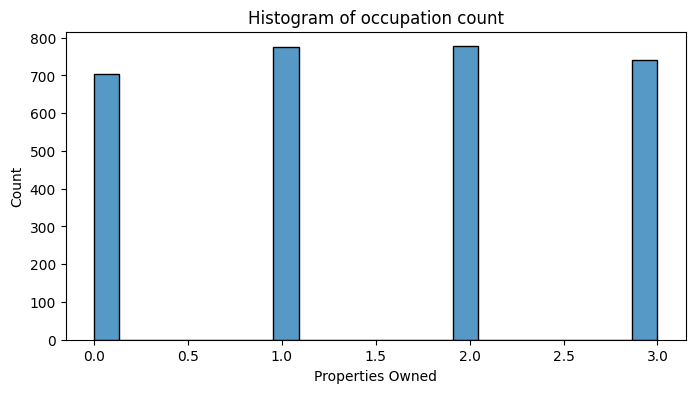

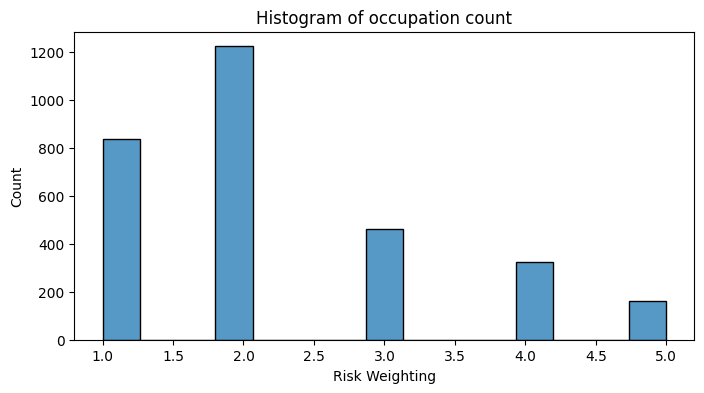

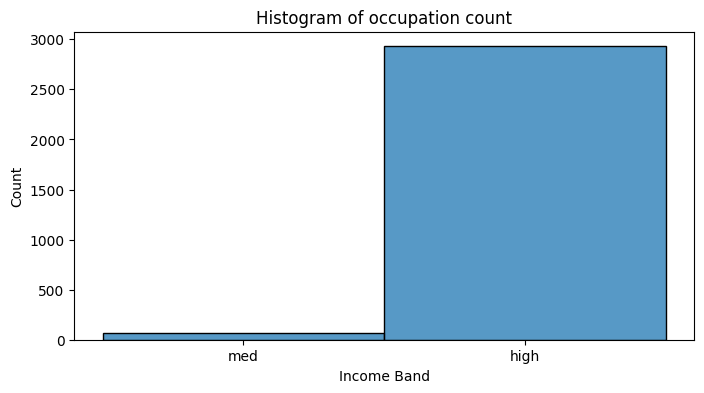

In [22]:
for col in categorical_cols:
  if col== "Occupation":
    continue
  plt.figure(figsize=(8,4))
  sns.histplot(df[col])
  plt.title("Histogram of occupation count")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()

In [23]:
##Numerical Analysis



In [24]:
numerical_cols = ["Estimated Income","Superannuation Savings"]
plt.figure(figsiz=(8,4))
for i,col in enumerate(numerical_cols):
  plt.subplot(1,2,i+1)
  sns.histplot(df[col],kde=True)
  plt.title(col)
  plt.show()

AttributeError: Figure.set() got an unexpected keyword argument 'figsiz'

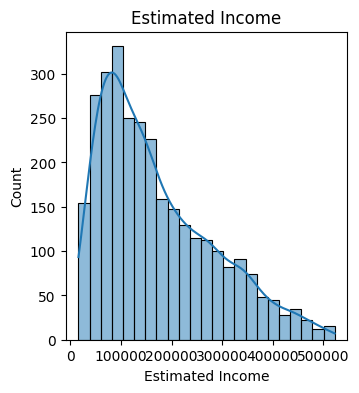

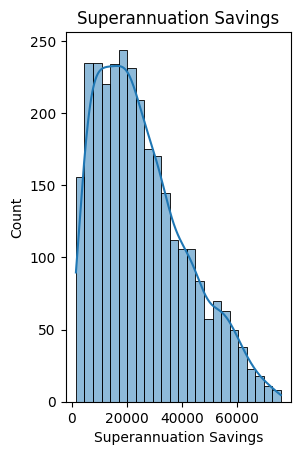

In [26]:
numerical_cols = ["Estimated Income","Superannuation Savings"]
plt.figure(figsize=(8,4))
for i,col in enumerate(numerical_cols):
  plt.subplot(1,2,i+1)
  sns.histplot(df[col],kde=True)
  plt.title(col)
  plt.show()

In [27]:
numerical_cols = ["Bank Loans","Checking Accounts","Credit Card Balance"]
plt.figure(figsiz=(8,4))
for i,col in enumerate(numerical_cols):
  plt.subplot(1,2,i+1)
  sns.histplot(df[col],kde=True)
  plt.title(col)
  plt.show()

AttributeError: Figure.set() got an unexpected keyword argument 'figsiz'

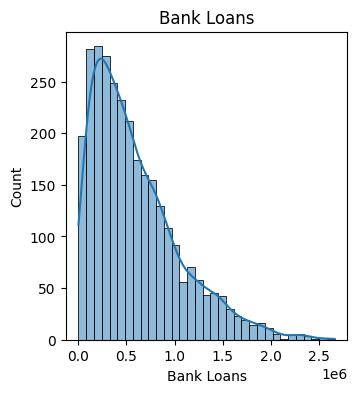

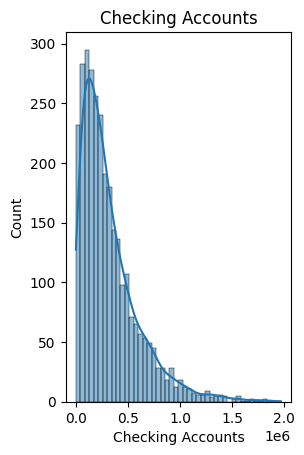

ValueError: num must be an integer with 1 <= num <= 2, not 3

<Figure size 640x480 with 0 Axes>

In [28]:
numerical_cols = ["Bank Loans","Checking Accounts","Credit Card Balance"]
plt.figure(figsize=(8,4))
for i,col in enumerate(numerical_cols):
  plt.subplot(1,2,i+1)
  sns.histplot(df[col],kde=True)
  plt.title(col)
  plt.show()

In [29]:
numerical_cols = ["Estimated Income","Superannuation Savings","Bank Loans","Checking Accounts","Credit Card Balance", "Bank Loans","Bank Deposits"]
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
  plt.subplot(4,3,i+1)
  sns.histplot(df[col],kde=True)
  plt.title(col)
  plt.show()

AttributeError: Figure.set() got an unexpected keyword argument 'figsiz'

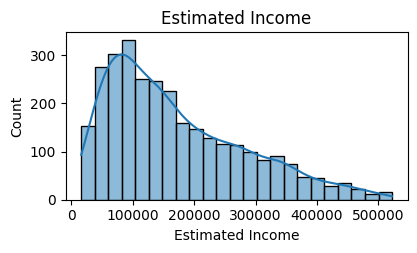

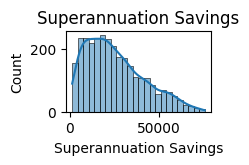

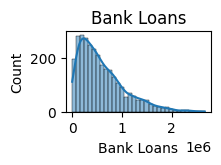

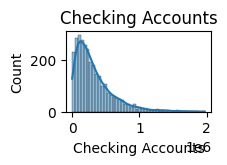

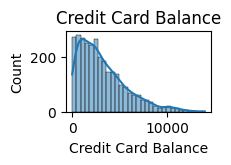

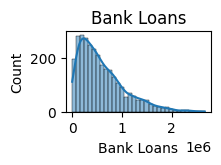

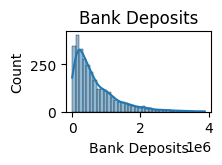

In [30]:
numerical_cols = ["Estimated Income","Superannuation Savings","Bank Loans","Checking Accounts","Credit Card Balance", "Bank Loans","Bank Deposits"]
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
  plt.subplot(4,3,i+1)
  sns.histplot(df[col],kde=True)
  plt.title(col)
  plt.show()